In [220]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [221]:
import warnings
warnings.filterwarnings('ignore')

In [222]:
data = pd.read_csv("Copper_Set.csv")
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Null Percentage calculation and handling Null Values

In [224]:
data.isnull().mean()*100

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

In [225]:
data['material_ref']

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

In [226]:
# In the material_ref column, there are 42% null values and many values which started with zeros should be replaced with 
# null ( as prescribed in the ducumentation), we should drop that column. Even though that column is important, we 
# need , subject expect what we should do with the column missing. So, for now I am dropping that

data.drop('material_ref', axis=1, inplace= True)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  product_ref    181673 non-null  int64  
 11  delivery date  181672 non-null  float64
 12  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 18.0+ MB


In [228]:
data.isnull().mean()*100

id               0.001101
item_date        0.000550
quantity tons    0.000000
customer         0.000550
country          0.015412
status           0.001101
item type        0.000000
application      0.013211
thickness        0.000550
width            0.000000
product_ref      0.000000
delivery date    0.000550
selling_price    0.000550
dtype: float64

In [229]:
# Dropping the null values
data.dropna(inplace=True)

In [230]:
data.isnull().mean()*100

id               0.0
item_date        0.0
quantity tons    0.0
customer         0.0
country          0.0
status           0.0
item type        0.0
application      0.0
thickness        0.0
width            0.0
product_ref      0.0
delivery date    0.0
selling_price    0.0
dtype: float64

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181636 non-null  object 
 1   item_date      181636 non-null  float64
 2   quantity tons  181636 non-null  object 
 3   customer       181636 non-null  float64
 4   country        181636 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181636 non-null  object 
 7   application    181636 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181636 non-null  float64
 10  product_ref    181636 non-null  int64  
 11  delivery date  181636 non-null  float64
 12  selling_price  181636 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 19.4+ MB


## Data Type Manipulations

In [232]:
# as our date is in the format of year monthe and date - the format should be %y %m %d
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33


In [233]:
# As the 'id' column is unique identifier for every column, it is transaction id- we can remove for now
data.drop('id', axis=1, inplace=True ) 

In [234]:
# 'quantity tons' should be numeric, but it is in 'object' type. so, conver it to numeric
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors= 'coerce')

In [235]:
# `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items.
# It is unique for every row. we can remove the column for now
data.drop('customer', axis=1, inplace=True ) 

In [236]:
# 'country', 'status', 'status','application' are categorial columns, so transform them
data['country'] = data['country'].astype('category')
data['status'] = data['status'].astype('category')
data['status'] = data['status'].astype('category')
data['application'] = data['application'].astype('category')
data['item type'] = data['item type'].astype('category')

In [237]:
# 'product_ref' to be a reference or identifier for the specific product.
data['product_ref'] = data['product_ref'].astype('category')

In [238]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181635.0,5876.102553,2.349320e+06,-2000.00,10.968428,30.363953,67.161869,1.000000e+09
thickness,181636.0,2.564160,6.572553e+00,0.18,0.700000,1.500000,3.000000,2.500000e+03
width,181636.0,1295.266159,2.616419e+02,1.00,1180.000000,1250.000000,1500.000000,2.990000e+03
selling_price,181636.0,1918.339290,3.318285e+05,-1160.00,669.000000,812.000000,953.000000,1.000010e+08


In [239]:
# quantity tons and selling_price are negative, they should not be negative. As they are only 4 rows we can drop them
data[data['quantity tons'] < 0].index

Int64Index([105730, 131473, 181661, 181671], dtype='int64')

In [240]:
data[data['selling_price'] < 0].index

Int64Index([28, 44761, 44810, 44865, 105189], dtype='int64')

In [241]:
data.drop(index=data[data['quantity tons'] < 0].index, inplace=True)
data.drop(index=data[data['selling_price'] < 0].index, inplace=True)

In [242]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181626.0,5876.403512,2.349379e+06,0.00001,10.969073,30.364197,67.162076,1.000000e+09
thickness,181627.0,2.564210,6.572702e+00,0.18000,0.700000,1.500000,3.000000,2.500000e+03
width,181627.0,1295.268308,2.616472e+02,1.00000,1180.000000,1250.000000,1500.000000,2.990000e+03
selling_price,181627.0,1918.438532,3.318367e+05,0.00000,669.000000,812.000000,953.000000,1.000010e+08


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181627 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181625 non-null  datetime64[ns]
 1   quantity tons  181626 non-null  float64       
 2   country        181627 non-null  category      
 3   status         181627 non-null  category      
 4   item type      181627 non-null  category      
 5   application    181627 non-null  category      
 6   thickness      181627 non-null  float64       
 7   width          181627 non-null  float64       
 8   product_ref    181627 non-null  category      
 9   delivery date  181625 non-null  datetime64[ns]
 10  selling_price  181627 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(4)
memory usage: 10.6 MB


In [244]:
data['duration'] = (data['delivery date'] - data['item_date']).dt.days

In [245]:
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91.0
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0.0
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,-90.0
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,-90.0
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,-31.0


In [246]:
# deleting the rows with negative duration, as the duration can not be nagative
data.drop(index= data[data['duration'] < 0].index, inplace=True)

## Encoding the categorial columns

In [247]:
from sklearn.preprocessing import LabelEncoder

In [248]:
data.select_dtypes('category').columns.values

array(['country', 'status', 'item type', 'application', 'product_ref'],
      dtype=object)

In [249]:
le = LabelEncoder()

for i in data.select_dtypes('category').columns.values:
    data[i] = le.fit_transform(data[i])

In [250]:
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,3,7,5,4,2.00,1500.0,22,2021-07-01,854.0,91.0
1,2021-04-01,768.024839,0,7,5,17,0.80,1210.0,20,2021-04-01,1047.0,0.0
5,2021-04-01,225.790676,0,7,5,17,1.50,1265.0,20,2021-04-01,983.0,0.0
6,2021-04-01,3.522613,4,0,5,17,0.38,1125.0,2,2021-07-01,18.0,91.0
8,2021-04-01,69.071853,6,7,3,4,0.60,1275.0,18,2021-07-01,1363.0,91.0


In [204]:
#data['Trans_year'] = data['item_date'].dt.year
#data['Trans_month'] = data['item_date'].dt.month
#data['Trans_day'] = data['item_date'].dt.day
#data['delivery_year'] = data['delivery date'].dt.year
#data['delivery_month'] = data['delivery date'].dt.month
#data['delivery_day'] = data['delivery date'].dt.day

In [205]:
#col_datetime = ['Trans_year', 'Trans_month', 'Trans_day','delivery_year', 'delivery_month', 'delivery_day']

In [206]:
#for i in col_datetime:
#    data[i] = le.fit_transform(data[i])

In [251]:
# As we got the data from datetime columns, we can drop them
data.drop(['item_date', 'delivery date' ], axis=1, inplace=True)

In [252]:
data.head(5)

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,duration
0,54.151139,3,7,5,4,2.00,1500.0,22,854.0,91.0
1,768.024839,0,7,5,17,0.80,1210.0,20,1047.0,0.0
5,225.790676,0,7,5,17,1.50,1265.0,20,983.0,0.0
6,3.522613,4,0,5,17,0.38,1125.0,2,18.0,91.0
8,69.071853,6,7,3,4,0.60,1275.0,18,1363.0,91.0


## Statistical analysis

In [253]:
corr_data = data.corr()

In [254]:
corr_data

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,duration
quantity tons,1.000000,-0.000671,-0.002763,-0.002639,-0.002084,-0.000636,-0.000478,-0.000292,-0.000009,0.000682
country,-0.000671,1.000000,0.110399,0.148236,-0.024804,-0.021807,0.044153,-0.121505,-0.001833,-0.265256
status,-0.002763,0.110399,1.000000,0.253122,0.128649,-0.049199,-0.087085,-0.075076,-0.002624,-0.240745
item type,-0.002639,0.148236,0.253122,1.000000,0.172412,-0.020740,-0.084440,-0.124479,-0.004885,-0.137560
application,-0.002084,-0.024804,0.128649,0.172412,1.000000,-0.074328,-0.212956,-0.209469,-0.001936,-0.153833
thickness,-0.000636,-0.021807,-0.049199,-0.020740,-0.074328,1.000000,0.160407,0.095151,-0.000840,0.023265
width,-0.000478,0.044153,-0.087085,-0.084440,-0.212956,0.160407,1.000000,0.044065,0.001202,0.020484
product_ref,-0.000292,-0.121505,-0.075076,-0.124479,-0.209469,0.095151,0.044065,1.000000,-0.000482,0.147438
selling_price,-0.000009,-0.001833,-0.002624,-0.004885,-0.001936,-0.000840,0.001202,-0.000482,1.000000,0.000425
duration,0.000682,-0.265256,-0.240745,-0.137560,-0.153833,0.023265,0.020484,0.147438,0.000425,1.000000


<AxesSubplot:>

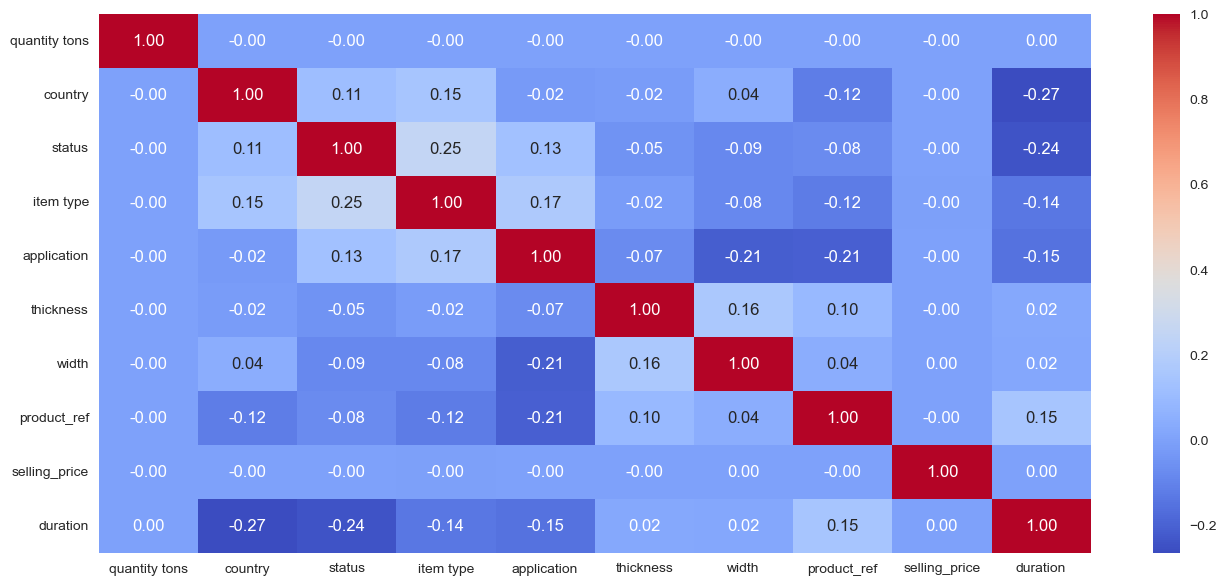

In [255]:
plt.figure(figsize=(16,7))
sns.heatmap(corr_data, annot=True, cmap= 'coolwarm', fmt='.2f')
# No values are highly correlated, so we can go ahead with out dropping column

## Distribution Check

In [256]:
data.head()

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,duration
0,54.151139,3,7,5,4,2.00,1500.0,22,854.0,91.0
1,768.024839,0,7,5,17,0.80,1210.0,20,1047.0,0.0
5,225.790676,0,7,5,17,1.50,1265.0,20,983.0,0.0
6,3.522613,4,0,5,17,0.38,1125.0,2,18.0,91.0
8,69.071853,6,7,3,4,0.60,1275.0,18,1363.0,91.0


In [257]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'duration'],
      dtype='object')

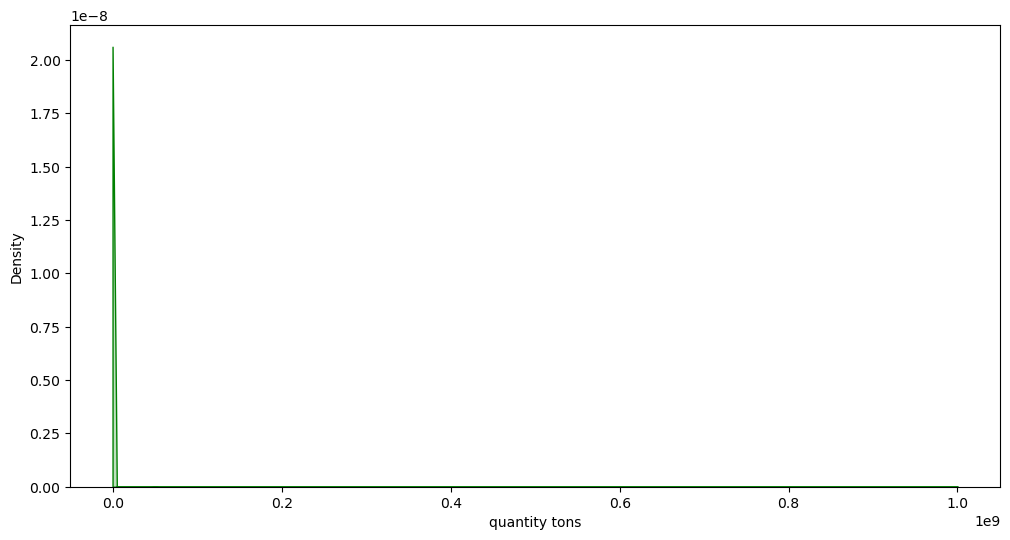

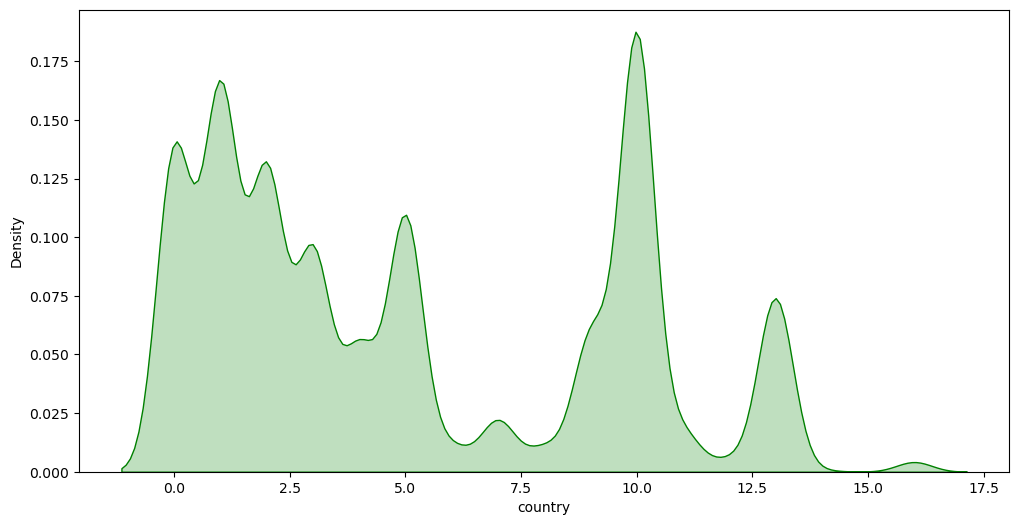

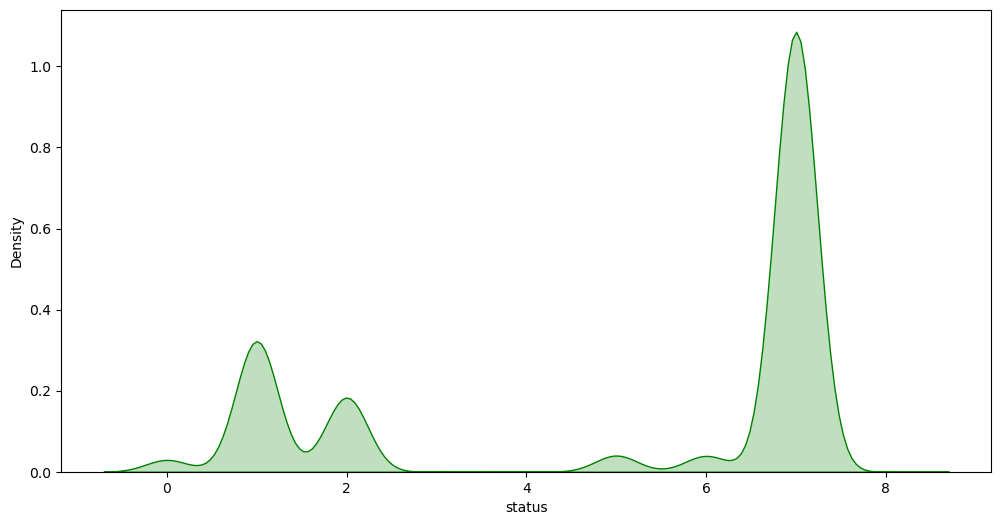

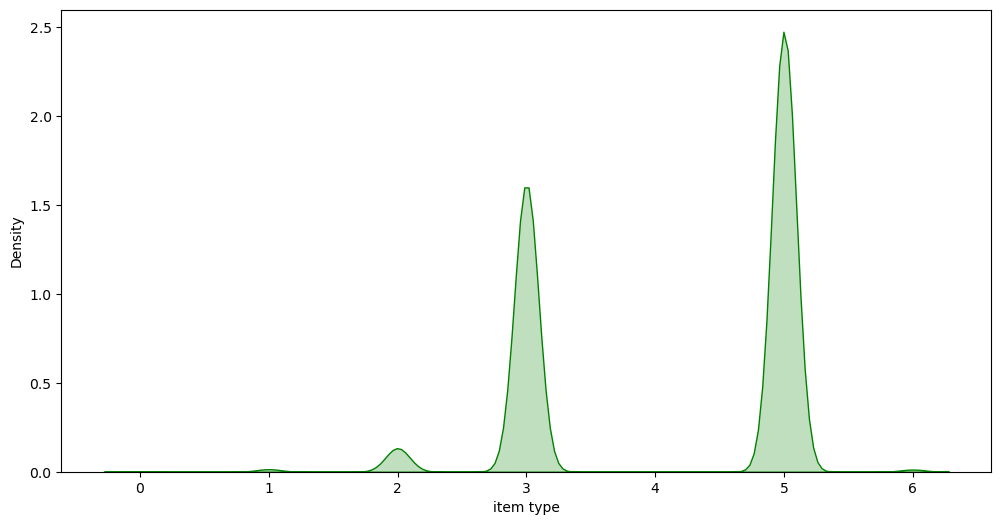

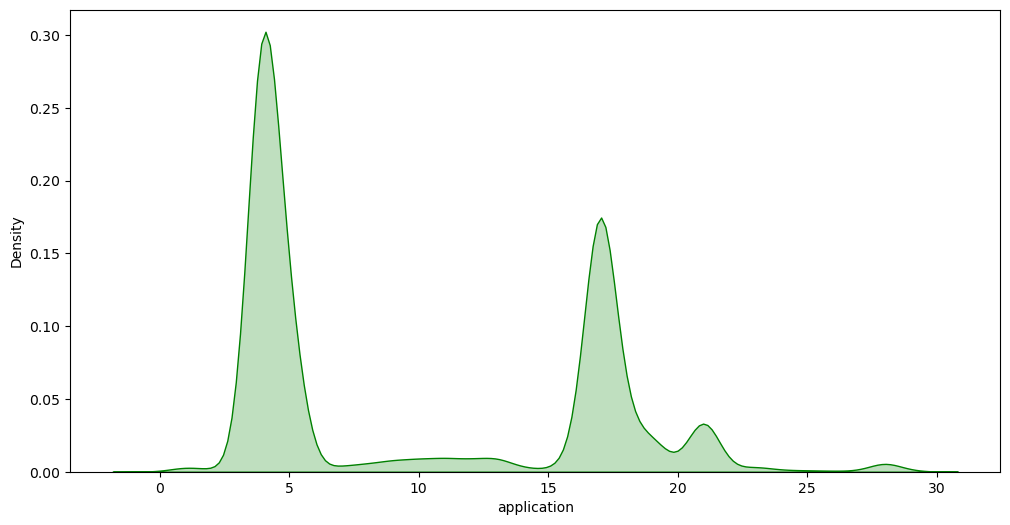

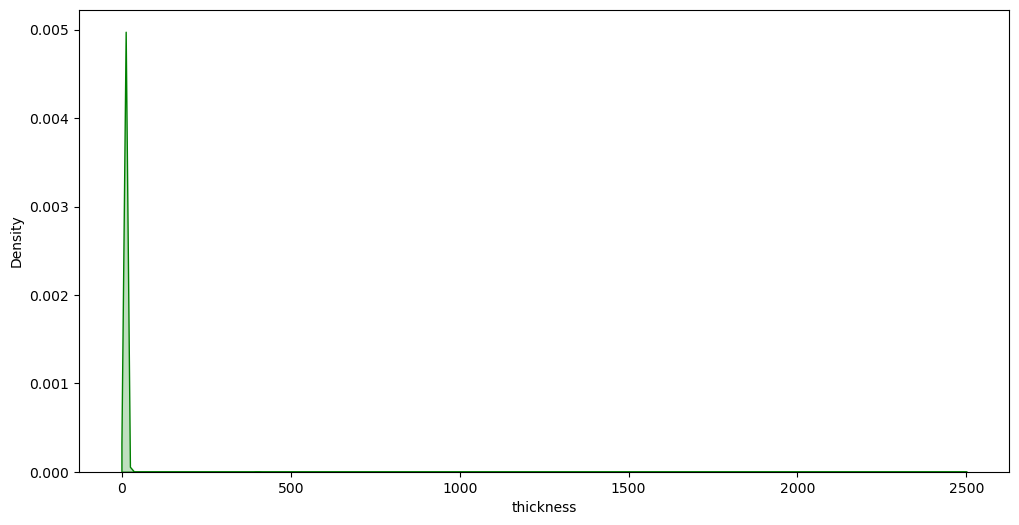

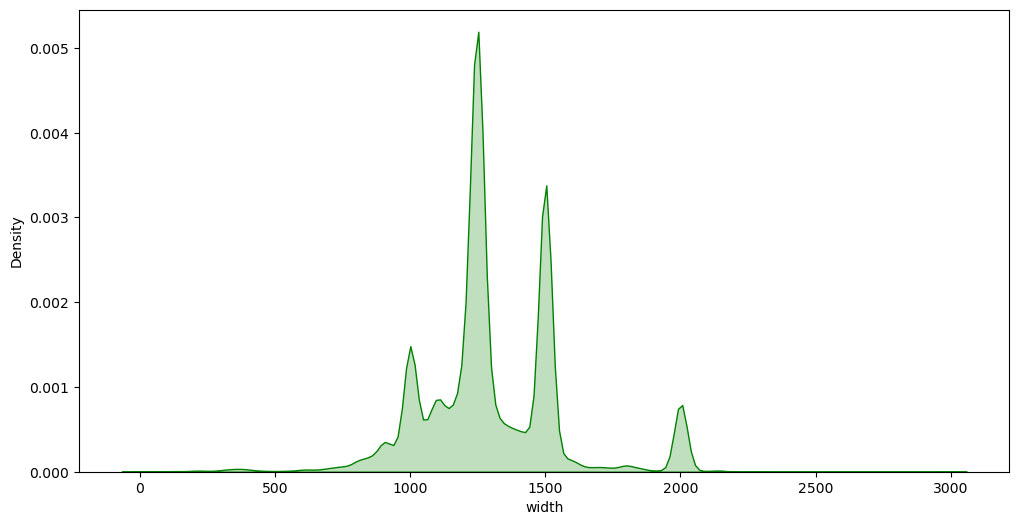

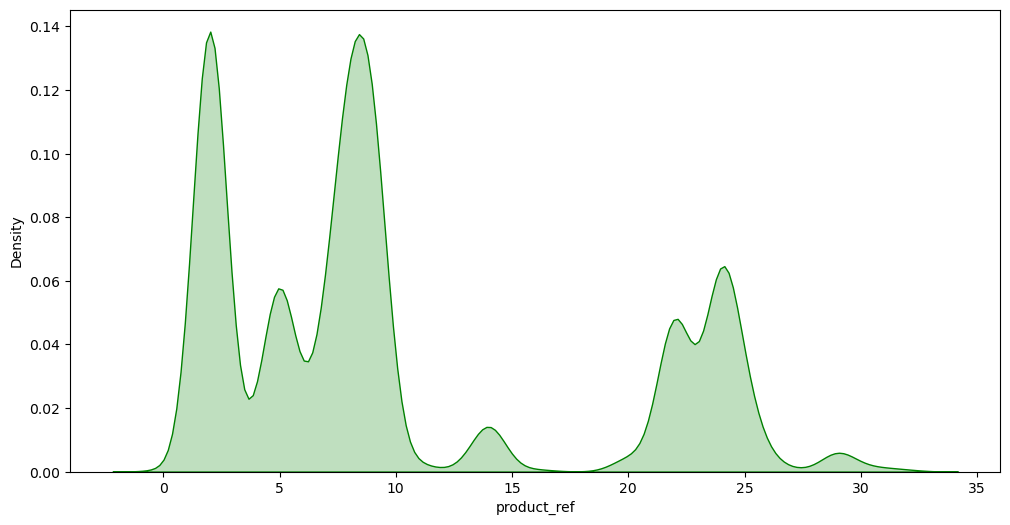

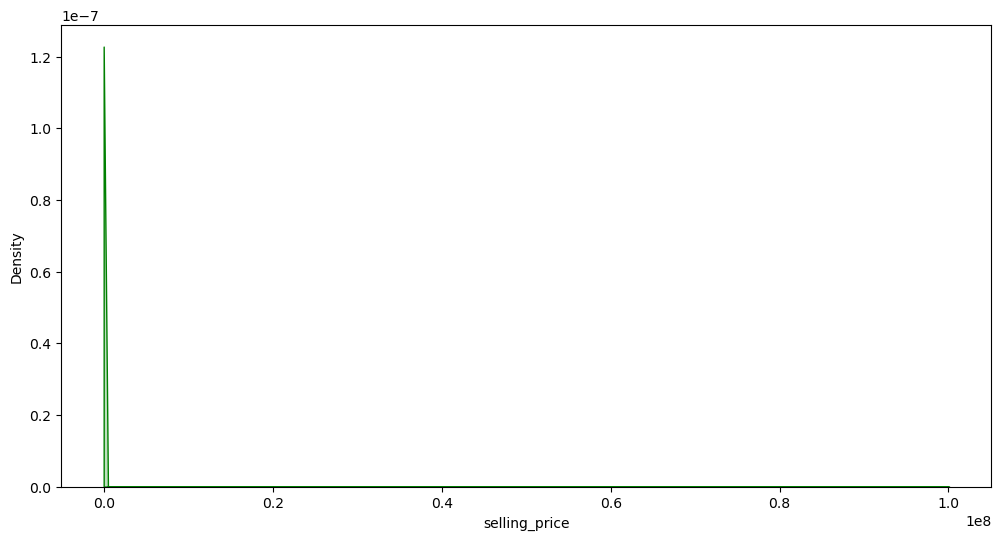

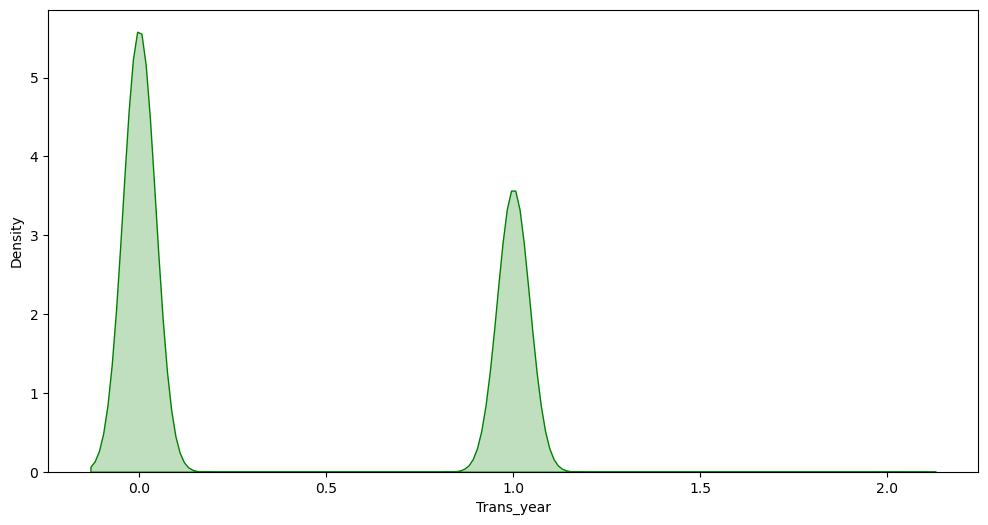

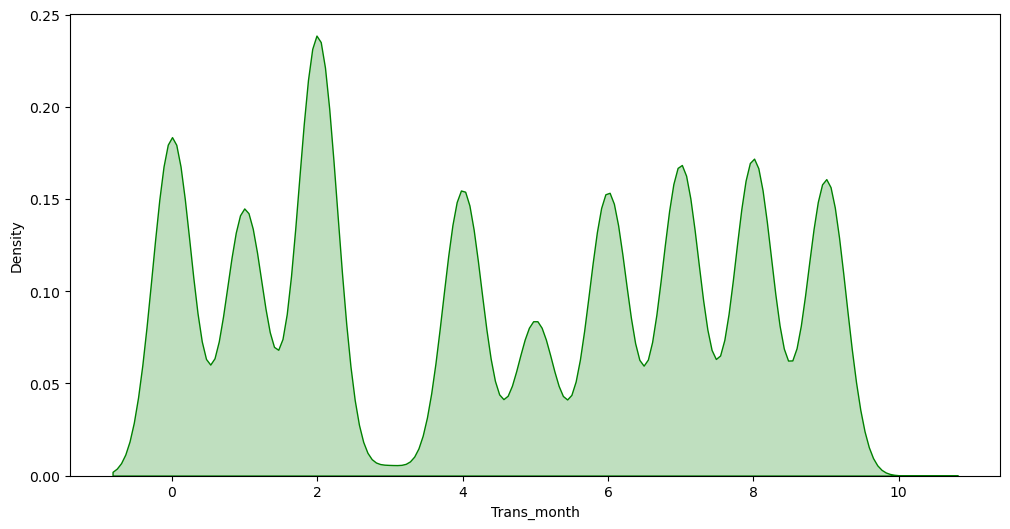

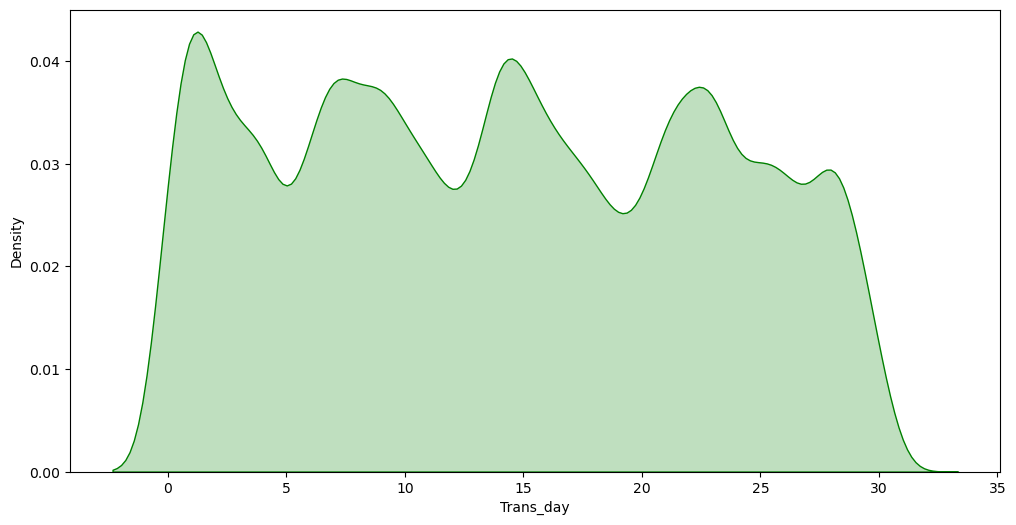

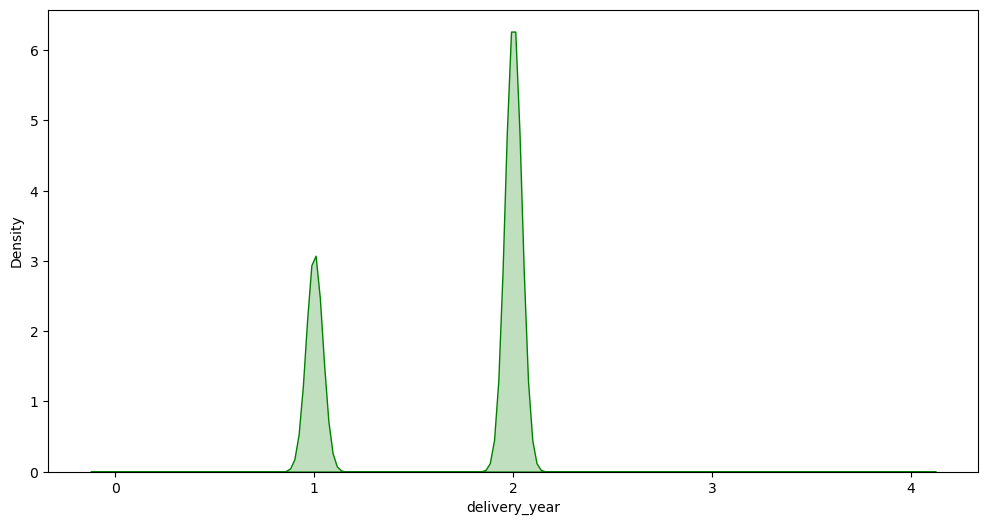

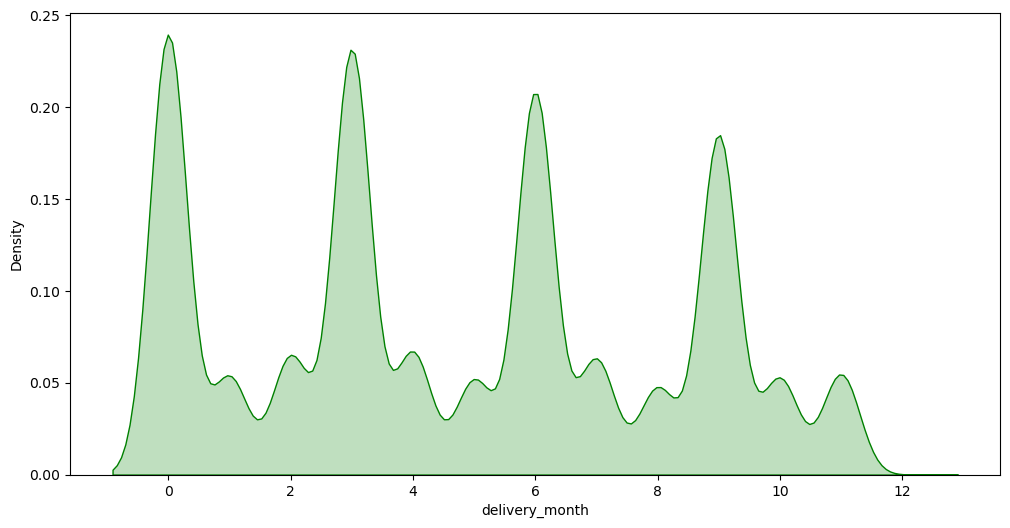

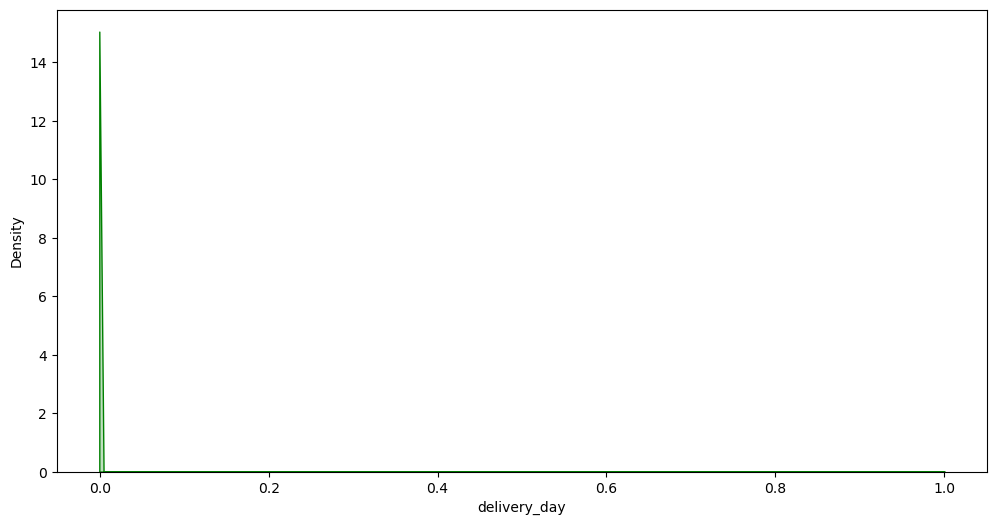

In [32]:
for i in data.columns:
    plt.figure(figsize=(12,6))
    sns.kdeplot(data[i], fill= True, color= 'g')

<AxesSubplot:>

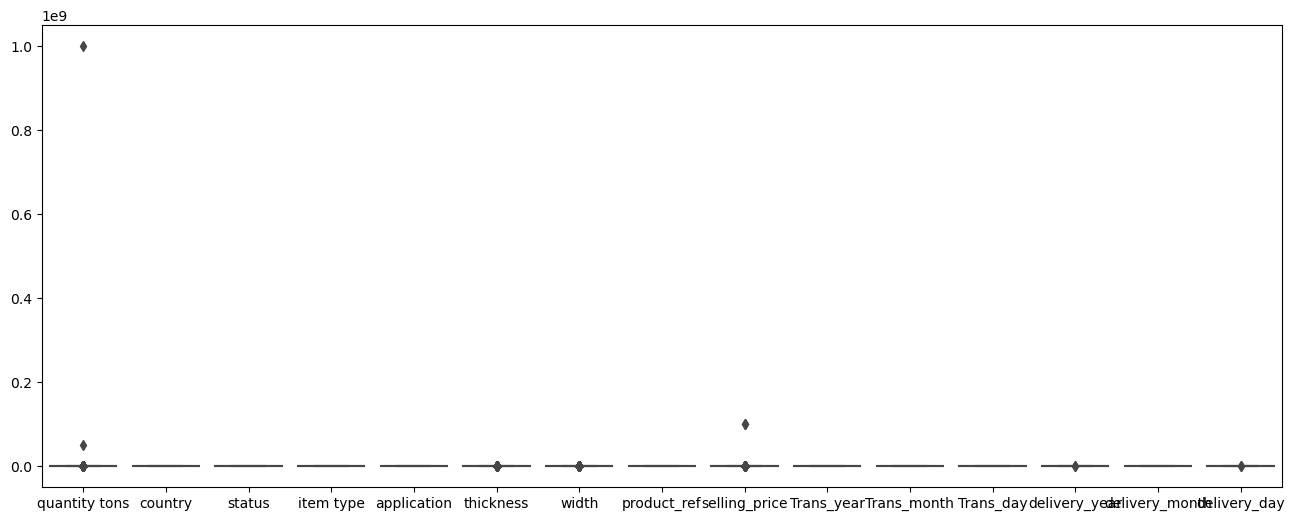

In [33]:
plt.figure(figsize=(16,6))
sns.boxplot(data = data)

In [34]:
# The box plot and kde plot looks fine

In [260]:
data.dropna(inplace=True)

## Model Building

In [261]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'duration'],
      dtype='object')

In [262]:
data.isna().sum()

quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
duration         0
dtype: int64

In [263]:
X = data.drop(['selling_price'], axis=1)
Y = data['selling_price']

In [264]:
data.head()

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,duration
0,54.151139,3,7,5,4,2.00,1500.0,22,854.0,91.0
1,768.024839,0,7,5,17,0.80,1210.0,20,1047.0,0.0
5,225.790676,0,7,5,17,1.50,1265.0,20,983.0,0.0
6,3.522613,4,0,5,17,0.38,1125.0,2,18.0,91.0
8,69.071853,6,7,3,4,0.60,1275.0,18,1363.0,91.0


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165517 entries, 0 to 181531
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  165517 non-null  float64
 1   country        165517 non-null  int64  
 2   status         165517 non-null  int32  
 3   item type      165517 non-null  int32  
 4   application    165517 non-null  int64  
 5   thickness      165517 non-null  float64
 6   width          165517 non-null  float64
 7   product_ref    165517 non-null  int64  
 8   selling_price  165517 non-null  float64
 9   duration       165517 non-null  float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 12.6 MB


In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [266]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
mean_squared_error(y_test,rf.predict(x_test))

201385257856.8649

In [267]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
mean_squared_error(y_test,gb.predict(x_test))

201386131169.48953

In [268]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
mean_squared_error(y_test,ab.predict(x_test))

201386547044.82935

In [269]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
xb = xgb.XGBRegressor()
xb.fit(x_train,y_train)
mean_squared_error(y_test,xb.predict(x_test))

201385739776.66766

In [274]:
rf = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True)
rf.fit(x_train,y_train)
mean_squared_error(y_test,rf.predict(x_test))

201385202083.36725

In [44]:
# As the Gradient Boosting algorithm is giving the least MSE, We will build the model with Gradient Boosting

In [45]:
#import pickle
#with open('model.pkl', 'wb') as m:
#    pickle.dump(gb, m)

In [46]:
# data.columns

## Classifier

In [219]:
X.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'duration', 'Trans_year',
       'Trans_month', 'Trans_day', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

In [278]:
X = data.drop(['status'], axis=1)
Y = data['status']

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [280]:
y_train

143898    7
107253    7
65138     7
178129    2
151819    7
         ..
151237    5
35378     7
5271      6
152724    1
6394      7
Name: status, Length: 115861, dtype: int32

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
accuracy_score(y_test,rfc.predict(x_test))

0.9145923956822942

In [282]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
accuracy_score(y_test,gbc.predict(x_test))

0.7195102303850491

In [283]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
accuracy_score(y_test,abc.predict(x_test))

0.6293499275012083

In [285]:
# xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
xbc = xgb.XGBClassifier()
xbc.fit(x_train,y_train)
accuracy_score(y_test,xbc.predict(x_test))

0.8284799420009666

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_x_train  = ss.fit_transform(x_train)
scaled_x_test = ss.fit_transform(x_test)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
gb = GradientBoostingRegressor()
gb.fit(scaled_x_train,y_train)
mean_absolute_error(y_test,gb.predict(scaled_x_test))

5065.114471720962

In [52]:
x_train.shape

(127144, 13)

In [54]:
scaled_x_train.shape

(127144, 13)

In [271]:
from pycaret.regression import *

setup( X ,target=Y)

,Description,Value
0,Session id,8277
1,Target,selling_price
2,Target type,Regression
3,Original data shape,"(165517, 10)"
4,Transformed data shape,"(165517, 10)"
5,Transformed train set shape,"(115861, 10)"
6,Transformed test set shape,"(49656, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [272]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,42.1828,7892.5086,86.5189,0.8563,0.0881,0.0543,28.6780
et,Extra Trees Regressor,37.5360,8683.5891,89.4210,0.8431,0.0902,0.0504,20.9910
xgboost,Extreme Gradient Boosting,67.6711,11014.2883,103.6298,0.7974,0.1681,0.1060,0.4280
catboost,CatBoost Regressor,71.0901,11521.6321,106.0874,0.7878,0.1764,0.1143,8.9200
lightgbm,Light Gradient Boosting Machine,79.2784,13202.4134,113.8685,0.7562,0.1714,0.1140,0.5580
dt,Decision Tree Regressor,49.6346,14660.1555,118.7499,0.7288,0.1195,0.0639,0.4660
gbr,Gradient Boosting Regressor,95.6339,17231.8258,130.5585,0.6804,0.2027,0.1493,5.6480
knn,K Neighbors Regressor,104.6831,28045.2355,167.1211,0.4767,0.4208,0.5753,0.4040
ada,AdaBoost Regressor,129.6347,33358.1299,182.5229,0.3740,0.3266,0.4326,0.7820
ridge,Ridge Regression,141.9738,41299.9258,202.9800,0.2275,0.5349,0.9930,0.0640


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=8277)

In [ ]:
# 7 - WON
# 1- LOST
# 2 - Not lost for AM
# 5 - Revised
# 6 - To be approved
# 0 - Draft
# 4 - Offered
# 3 - Offerable
#8 -Wonderful               1